In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import os

In [2]:
#settings for pandas to make output larger

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 150)

In [3]:
#intializing a dictonary for the data files
data_dic = {}

In [4]:
#read in data
#use pandas to read the file and assign results to variable
#file is top 10 countries in decending order
def read_file_sipri(file):
    columns = ['Country']
    rows = ['USA','United States of America', 'Korea, South', 'China', 'Russia', 'India'
            , 'Saudi Arabia', 'UK','United Kingdom', 'Germany', 'France', 'South Korea', 'Japan']
    for i in range(21):
        columns.append(str(2000+i))

    data_frame = pd.read_csv(file, sep=',', header=5)
    data_frame = data_frame[columns].round(decimals=2)
    data_frame = data_frame[data_frame['Country'].isin(rows)]
    data_frame[columns[1:]] = data_frame[columns[1:]].apply(pd.to_numeric, errors='coerce')
    data_frame = data_frame.sort_values(by='2020',ascending=False)
    data_frame.index = range(1, len(data_frame) + 1)
    data_frame = data_frame.head(10)

    return data_frame

#SIPRI file with percentage values
def read_file_sipri_percent(file):
    columns = ['Country']
    rows = ['United States of America','USA', 'Korea, Rep.', 'China', 'Russia', 'India'
            , 'Saudi Arabia', 'United Kingdom', 'UK', 'Germany', 'France', 'Korea, South', 'Japan']
    for i in range(21):
        columns.append(str(2000+i))

    data_frame = pd.read_csv(file, sep=',', header=5)
    data_frame = data_frame[columns].round(decimals=2)
    data_frame = data_frame[data_frame['Country'].isin(rows)]
    for c in columns[1:]:
        data_frame[c] = pd.to_numeric(data_frame[c].str.rstrip('%'), errors='coerce')
    
    data_frame = data_frame.sort_values(by='2020',ascending=False)
    data_frame.index = range(1, len(data_frame) + 1)
    data_frame = data_frame.head(10)

    return data_frame

#world bank file
def read_file_wb(file):
    columns = ['Country']
    rows = ['USA', 'Korea, South', 'China', 'Russia', 'India'
            , 'Saudi Arabia', 'UK', 'Germany', 'France', 'Korea, Rep.', 'Japan']
    for i in range(21):
        columns.append(str(2000+i))

    data_frame = pd.read_csv(file, sep=',', header=2)
    data_frame = data_frame[columns].round(decimals=2)
    data_frame = data_frame[data_frame['Country'].isin(rows)]
    data_frame[columns[1:]] = data_frame[columns[1:]].apply(pd.to_numeric, errors='coerce')
    data_frame = data_frame.sort_values(by='2020',ascending=False)
    data_frame.index = range(1, len(data_frame) + 1)
    data_frame = data_frame.head(10)

    return data_frame

In [5]:
#add the read files to the dictionary
data_dic['total_spending.csv'] = read_file_sipri('total_spending.csv')
data_dic['spending_per_capita.csv'] = read_file_sipri('spending_per_capita.csv')
data_dic['military_spending_GDP.csv'] = read_file_sipri_percent('military_spending_GDP.csv')
data_dic['gdp.csv'] = read_file_wb('gdp.csv')
data_dic['gdp_per_capita.csv'] = read_file_wb('gdp_per_capita.csv')
data_dic['health_spending_per_capita.csv'] = read_file_wb('health_spending_per_capita.csv')
data_dic['education_spending_GDP.csv'] = read_file_wb('education_spending_GDP.csv')
data_dic['health_spending_GDP.csv'] = read_file_wb('health_spending_GDP.csv')
data_dic['population.csv'] = read_file_wb('population.csv')

In [6]:
# index the data and update the dictionary
file_data_dict = {}
for file_name, data in data_dic.items():
    all_data_indexed = data.set_index(['Country']).sort_index()
    file_data_dict[file_name] = all_data_indexed

In [7]:
#calculate the total spending with the Percent GDP and the GDP
def calculate(percent, gdp):
    spending = (percent/ 100) * gdp
    spending = spending.round(decimals=2)
    return spending

In [8]:
#Compare the spending data to that country’s GDP
def spending_to_GDP():
    local = ['education_spending_GDP.csv', 'health_spending_GDP.csv', 'military_spending_GDP.csv']
    for item in local:
        countries_with_USA = file_data_dict[item].index.tolist()

        pp.figure(figsize=(15,6))
        for country in countries_with_USA:
            country_data = file_data_dict[item].loc[country]
            country_data.plot()
        pp.title('Percent of GDP - {}'.format(item))
        pp.xlabel('Year')
        pp.ylabel('Percent of GDP')
        pp.legend(countries_with_USA)
        pp.show()

In [9]:
#Compare the education and health to the overall military spending of the country
def totals_comp():
    education = file_data_dict['education_spending_GDP.csv'].loc[:,'2020']
    health = file_data_dict['health_spending_GDP.csv'].loc[:,'2020']
    military = file_data_dict['military_spending_GDP.csv'].loc[:,'2020']
    gdp = file_data_dict['gdp.csv'].loc[:,'2020']
    
    education_spending = calculate(education, gdp)
    health_spending = calculate(health, gdp)
    military_spending = calculate(military, gdp)
    
    data_frame = pd.DataFrame({'Education': education_spending,
                              'Health': health_spending,
                              'Military': military_spending})
    ax = data_frame.plot(kind='bar',figsize=(15,8))
    pp.title('Total Spending in each Field')
    pp.xlabel('Country')
    pp.ylabel('Spending in USD')
    ax.legend(['Eduaction Spending', 'Health Spending', 'Military Spending'])
    pp.show()

In [10]:
#Compare the per person educational spending to the per person GDP
def education_GDP_per_capita():
    education = file_data_dict['education_spending_GDP.csv'].loc[:,'2020']
    population = file_data_dict['population.csv'].loc[:,'2020']
    gdp_per_capita = file_data_dict['gdp_per_capita.csv'].loc[:,'2020']
    gdp = file_data_dict['gdp.csv'].loc[:,'2020']
    
    education_spending = calculate(education, gdp)
    education_per_capita = (education_spending / population)
    
    data_frame = pd.DataFrame({'Education Spending Per Capita' : education_per_capita, 'GDP Per Capita': gdp_per_capita})
    ax = data_frame.plot(kind='bar',figsize=(15,8))
    pp.title('Per Capita Educational Spending vs Per Capita GDP')
    pp.xlabel('Country')
    pp.ylabel('Spending in USD')
    ax.legend(['Education Spending Per Capita', 'GDP Per Capita'])
    pp.show()

In [11]:
def health_GDP_per_capita():
    health = file_data_dict['health_spending_GDP.csv'].loc[:,'2020']
    population = file_data_dict['population.csv'].loc[:,'2020']
    gdp_per_capita = file_data_dict['gdp_per_capita.csv'].loc[:,'2020']
    gdp = file_data_dict['gdp.csv'].loc[:,'2020']
    
    health_spending = calculate(health, gdp)
    health_per_capita = (health_spending / population)
    
    data_frame = pd.DataFrame({'Health Spending Per Capita' : health_per_capita, 'GDP Per Capita': gdp_per_capita})
    ax = data_frame.plot(kind='bar',figsize=(15,8))
    pp.title('Per Capita Health Spending vs Per Capita GDP')
    pp.xlabel('Country')
    pp.ylabel('Spending in USD')
    ax.legend(['Health Spending Per Capita', 'GDP Per Capita'])
    pp.show()

In [12]:
def military_GDP_per_capita():
    military = file_data_dict['military_spending_GDP.csv'].loc[:,'2020']
    population = file_data_dict['population.csv'].loc[:,'2020']
    gdp_per_capita = file_data_dict['gdp_per_capita.csv'].loc[:,'2020']
    gdp = file_data_dict['gdp.csv'].loc[:,'2020']
    
    military_spending = calculate(military, gdp)
    military_per_capita = (military_spending / population)
    
    data_frame = pd.DataFrame({'Military Spending Per Capita' : military_per_capita, 'GDP Per Capita': gdp_per_capita})
    ax = data_frame.plot(kind='bar',figsize=(15,8))
    pp.title('Per Capita Military Spending vs Per Capita GDP')
    pp.xlabel('Country')
    pp.ylabel('Spending in USD')
    ax.legend(['Military Spending Per Capita', 'GDP Per Capita'])
    pp.show()

In [13]:
#Fastest growing countries educational spending in fixed value

def graph_fixed_growth_education():
    education = file_data_dict['education_spending_GDP.csv']
    gdp = file_data_dict['gdp.csv']

    education_spending = calculate(education, gdp)

    fixed_growth_education = education_spending.loc[:, '2001':'2020'].diff(axis=1).sum(axis=1)
    fixed_growth_df = pd.DataFrame({'Fixed_Growth_Amount': fixed_growth_education})

    
    fixed_growth_df.plot(kind='bar', figsize=(15, 8))
    pp.title('Education Fixed Growth')
    pp.xlabel('Country')
    pp.ylabel('Average Growth in USD')
    pp.show()

In [14]:
#Fastest growing countries health spending in fixed value
def graph_fixed_growth_health():
    health = file_data_dict['health_spending_GDP.csv']
    gdp = file_data_dict['gdp.csv']

    health_spending = calculate(health, gdp)

    fixed_growth_health = health_spending.loc[:, '2001':'2020'].diff(axis=1).sum(axis=1)
    fixed_growth_df = pd.DataFrame({'Fixed_Growth_Amount': fixed_growth_health})

    
    fixed_growth_df.plot(kind='bar', figsize=(15, 8))
    pp.title('Health Fixed Growth')
    pp.xlabel('Country')
    pp.ylabel('Average Growth in USD')
    pp.show()

In [15]:
#Fastest growing countries educational spending in percentage
def graph_average_growth_percentage_education():
    education = file_data_dict['education_spending_GDP.csv']
    gdp = file_data_dict['gdp.csv']

    education_spending = calculate(education, gdp)
    
    growth_rate_data = education_spending.loc[:, '2001':'2020'].pct_change(axis=1).mean(axis=1)*100
    growth_rate_df = pd.DataFrame({'Average Growth Percentage': growth_rate_data})

    growth_rate_df.plot(kind='bar', figsize=(15, 8))
    pp.title('Education Growth Percentage')
    pp.xlabel('Country')
    pp.ylabel('Average Growth Percentage')
    pp.show()

In [16]:
#Fastest growing countries health spending in percentage
def graph_average_growth_percentage_health():
    health = file_data_dict['health_spending_GDP.csv']
    gdp = file_data_dict['gdp.csv']

    health_spending = calculate(health, gdp)
    
    growth_rate_data = health_spending.loc[:, '2001':'2020'].pct_change(axis=1).mean(axis=1)*100
    growth_rate_df = pd.DataFrame({'Average Growth Percentage': growth_rate_data})

    growth_rate_df.plot(kind='bar', figsize=(15, 8))
    pp.title('Health Growth Percentage')
    pp.xlabel('Country')
    pp.ylabel('Average Growth Percentage')
    pp.show()

In [17]:
#main fuction used for user interface
def main():
    print('This is the Military, Health, and Education Expenditure Database')
    print('Data visualization of the top 10 spenders from 2000 to 2020')
    print('Which statistcs would you like visualized')
    
    choice = ''
    while choice != 'stop':
        menu()
        choice = input('Choose a statistic:')
        result = stat_selection(choice)

In [18]:
#called by main function to display graphs
def stat_selection(choice):
    if choice == '1':
        spending_to_GDP()
    elif choice == '2':
        totals_comp()
    elif choice == '3':
        education_GDP_per_capita()
    elif choice == '4': 
        health_GDP_per_capita()
    elif choice == '5':
        military_GDP_per_capita()
    elif choice == '6':
        graph_fixed_growth_education()
        graph_fixed_growth_health()
        graph_average_growth_percentage_education()
        graph_average_growth_percentage_health()
    else:
        return 'stop'

In [19]:
#called by main function to give the user choices
def menu():
    print()
    print('1. Compare the spending data to that country’s GDP')
    print('2. Compare the education and health to the overall military spending of the country')
    print('3. Compare the per person educational spending to the per person GDP')
    print('4. Compare the per person healthcare spending to the per person GDP')
    print('5. Compare the per person military spending to the per person GDP')
    print('6. Fastest growing countries in healthcare and educational spending in fixed value and in percentage')
    print('Enter \'stop\' to quit the program')

This is the Military, Health, and Education Expenditure Database
Data visualization of the top 10 spenders from 2000 to 2020
Which statistcs would you like visualized

1. Compare the spending data to that country’s GDP
2. Compare the education and health to the overall military spending of the country
3. Compare the per person educational spending to the per person GDP
4. Compare the per person healthcare spending to the per person GDP
5. Compare the per person military spending to the per person GDP
6. Fastest growing countries in healthcare and educational spending in fixed value and in percentage
Enter 'stop' to quit the program
Choose a statistic:1


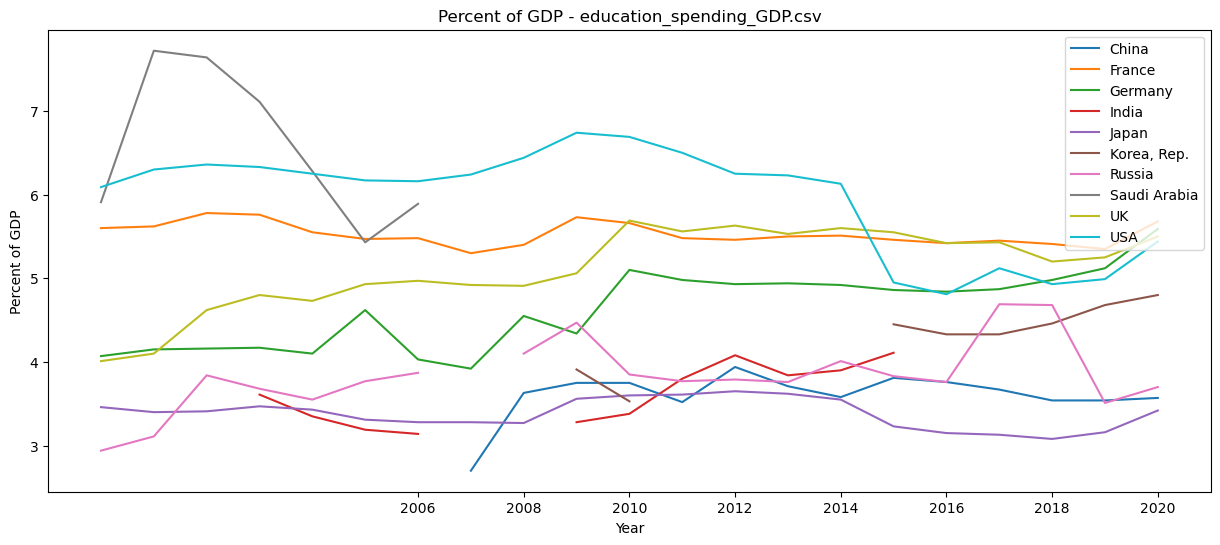

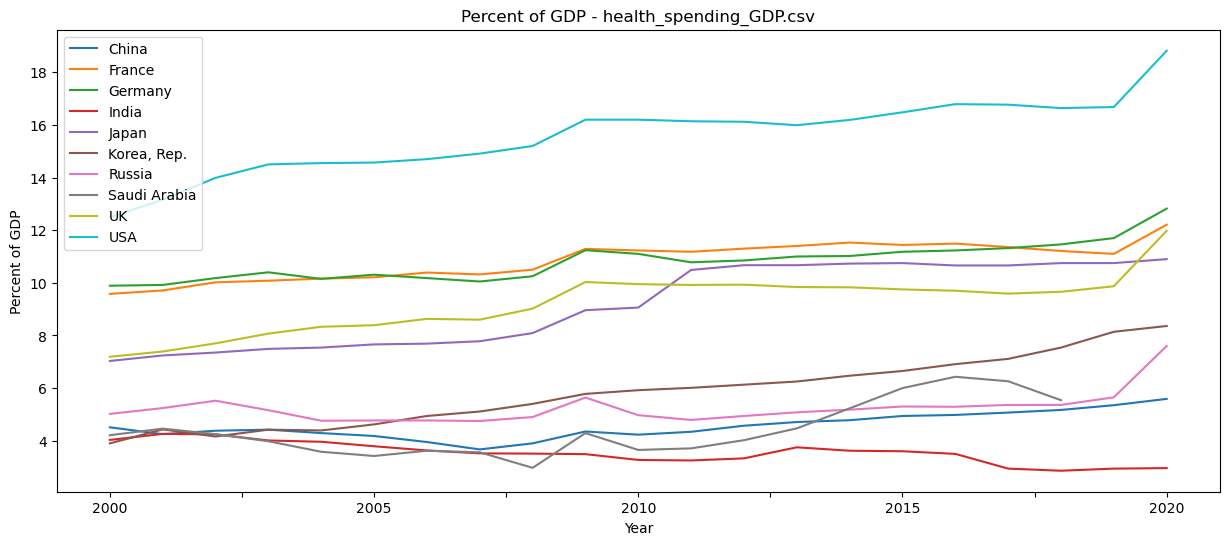

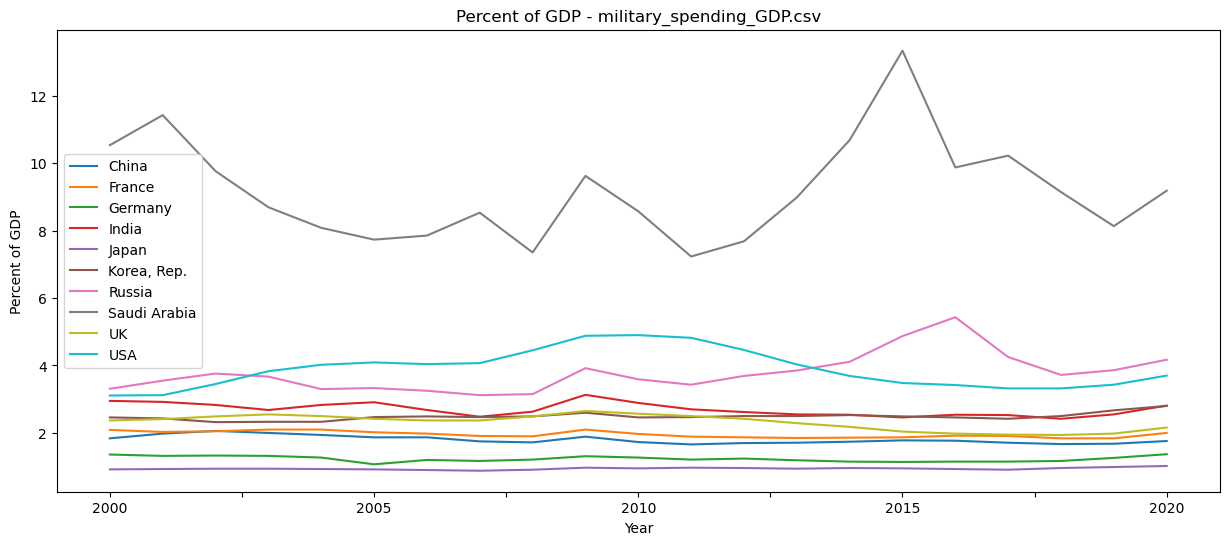


1. Compare the spending data to that country’s GDP
2. Compare the education and health to the overall military spending of the country
3. Compare the per person educational spending to the per person GDP
4. Compare the per person healthcare spending to the per person GDP
5. Compare the per person military spending to the per person GDP
6. Fastest growing countries in healthcare and educational spending in fixed value and in percentage
Enter 'stop' to quit the program
Choose a statistic:2


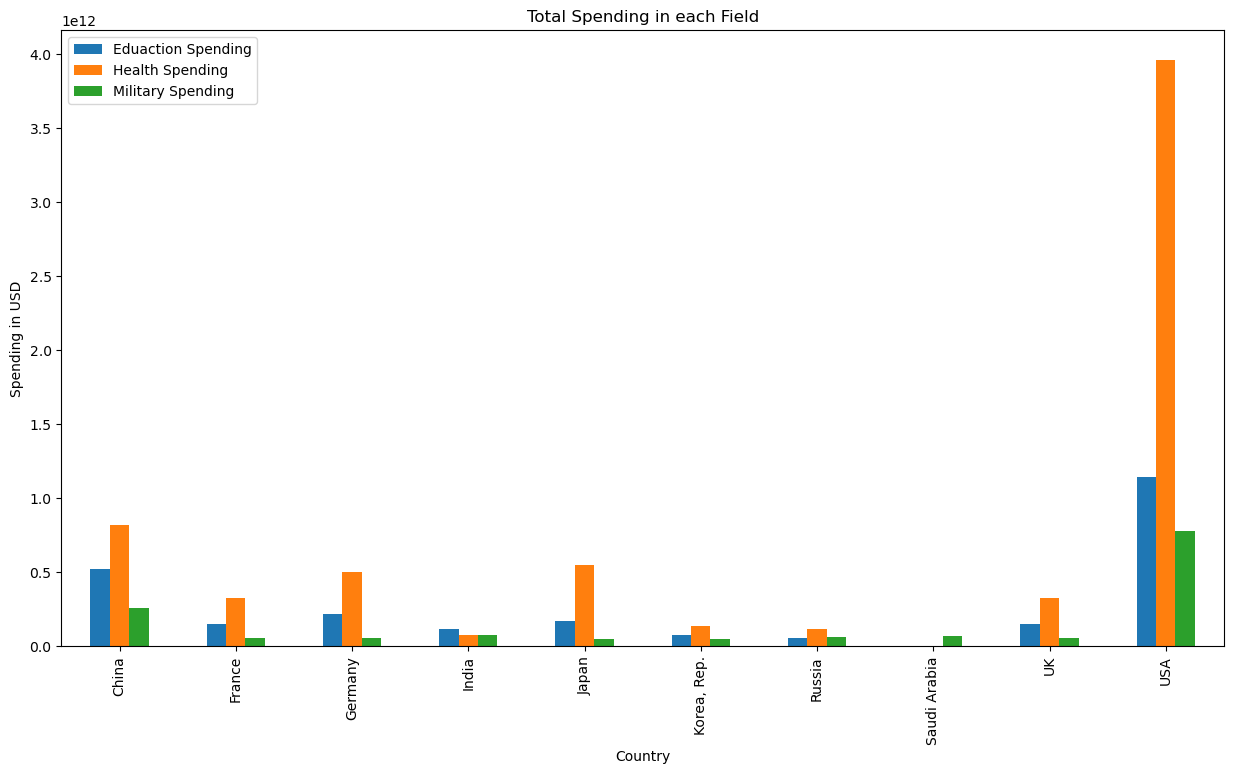


1. Compare the spending data to that country’s GDP
2. Compare the education and health to the overall military spending of the country
3. Compare the per person educational spending to the per person GDP
4. Compare the per person healthcare spending to the per person GDP
5. Compare the per person military spending to the per person GDP
6. Fastest growing countries in healthcare and educational spending in fixed value and in percentage
Enter 'stop' to quit the program
Choose a statistic:stop


In [22]:
main()